This week we'll look on visualizing our data. Although numbers can tell us a satisfying story, a visual of our data will allow us to easily identify trends (and will look amazing on a presentation \*hint\* \*hint\*).

In [1]:
%matplotlib inline
#don't mind this. I'm just trying to double check you work :)
def assertAns(condition, fail_str, suc_str):
    assert condition, fail_str
    print(suc_str)

In [213]:
import numpy as np #Linear algebra
import requests as req #Python's http library
import re #Python's Regex library
import pandas as pd #Python's data manipulation library
import matplotlib.pyplot as plt #Python's graphing library
import seaborn as sns #a graphing library for heatmaps

Lets start by importing the dataframe from last week's workshop. (Remember the pickle command?)

In [3]:
timeHourRainfallDF = pd.read_pickle("../saved_dataframes/workshop1RainfallDF")
timeHourRainfallDF.head()

,id,name,date,rainfall,time,hour
0,7677,RG_001,2017-06-01T00:00:00,0.0,00:00:00,00
1,7677,RG_001,2017-06-01T00:05:00,0.0,00:05:00,00
2,7677,RG_001,2017-06-01T00:10:00,0.0,00:10:00,00
3,7677,RG_001,2017-06-01T00:15:00,0.0,00:15:00,00
4,7677,RG_001,2017-06-01T00:20:00,0.0,00:20:00,00


MatplotLib is a useful library to view your data as a graph. This is a pretty expansive library and includes basically all types of graphs known to man (and most definately everything you've learned in a stats course).

Lets start by plotting the amount of rain by the time of day.

We'll start off by making two arrays, one to represent the x-values and the other the y-values.

In [4]:
x = timeHourRainfallDF["time"].values #the values() function will return all the values of the column as a list
y = timeHourRainfallDF["rainfall"].values

Now lets print out x and y to see how they look like

In [5]:
print(x)
print(y)

['00:00:00' '00:05:00' '00:10:00' ..., '23:50:00' '23:55:00' '00:00:00']
[ 0.  0.  0. ...,  0.  0.  0.]


Hmmm that's annoying. If you notice, the 'x' values are all strings but matplotlib doesn't really like non-primitive types. We'll have to represent these strings with a continuous variable for matplotlib to plot the points.

In [6]:
uniqueTimes = x
uniqueTimes = list(uniqueTimes)

In [7]:
for index,row in timeHourRainfallDF.iterrows():
    timeHourRainfallDF.set_value(index,'timeIndex', uniqueTimes.index(row["time"]))

In [8]:
timeHourRainfallDF.head()

,id,name,date,rainfall,time,hour,timeIndex
0,7677,RG_001,2017-06-01T00:00:00,0.0,00:00:00,00,0.0
1,7677,RG_001,2017-06-01T00:05:00,0.0,00:05:00,00,1.0
2,7677,RG_001,2017-06-01T00:10:00,0.0,00:10:00,00,2.0
3,7677,RG_001,2017-06-01T00:15:00,0.0,00:15:00,00,3.0
4,7677,RG_001,2017-06-01T00:20:00,0.0,00:20:00,00,4.0


now lets overwrite our 'x' variable

In [9]:
x = timeHourRainfallDF["timeIndex"].values

Now lets construct our graph.

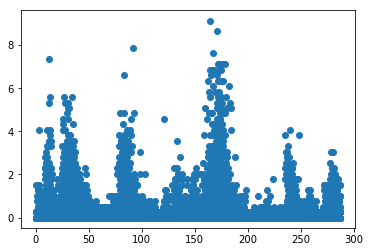

In [10]:
plt.scatter(x,y)

Hmm that's a bit small. lets increase it

We can also set lables for the table

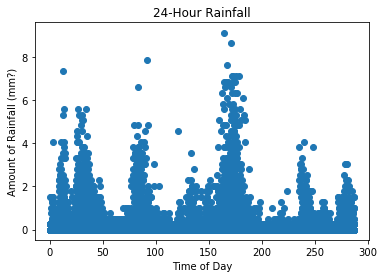

In [215]:
plt.title('24-Hour Rainfall')
plt.xlabel('Time of Day')
plt.ylabel('Amount of Rainfall (mm?)')
plt.scatter(x,y)

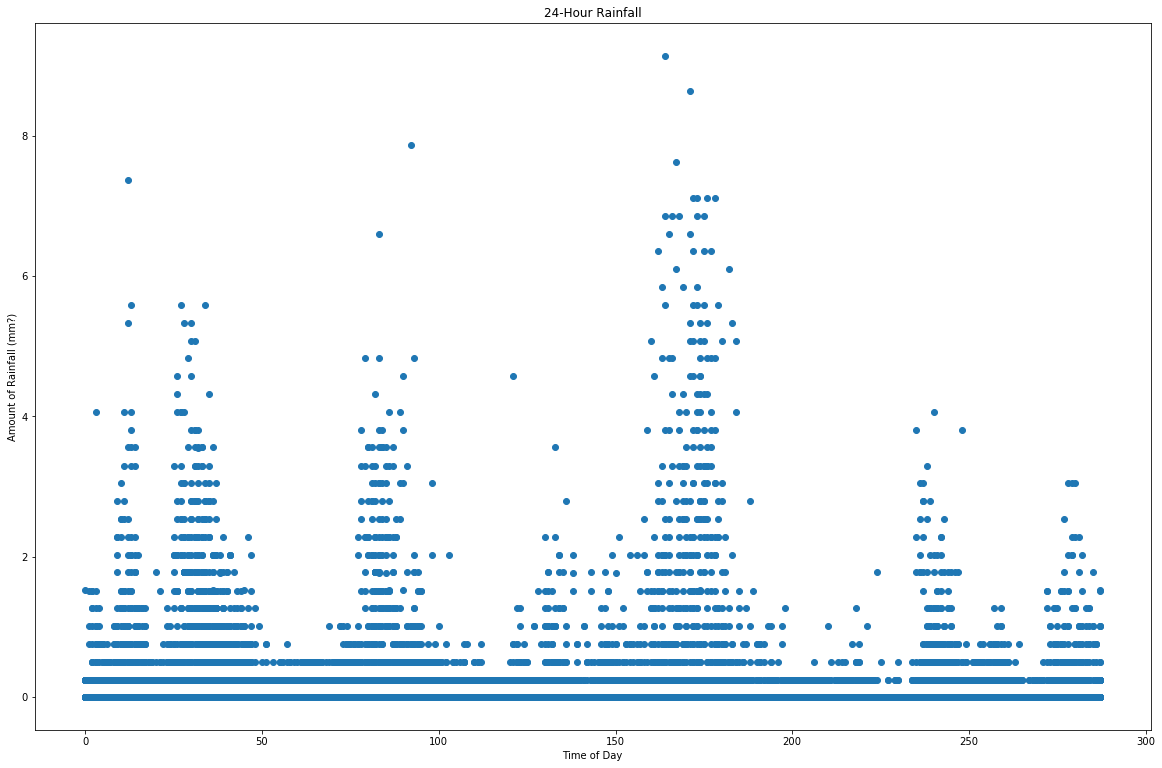

In [231]:
plt.title('24-Hour Rainfall')
plt.xlabel('Time of Day')
plt.ylabel('Amount of Rainfall (mm?)')
plt.rcParams["figure.figsize"] = "18, 13"
plt.scatter(x,y)

You can save your graphs by right-clicking on the image and select "save as". You can also preview ethem as larger images by righ-clicking and opening it in a new tab

To be honest I wasn't expecting spikes as clear as the ones shown above. And that's the beauty of graphing! It allows you to visually see patterns you might miss. Here you can clearly see when it rains the most and least in Toronto.

One of my favourite things to do is to plot two different variables against each other and look at their correlation. This will allow us to see which variables seem to have a correlation matrix.

In [12]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 })

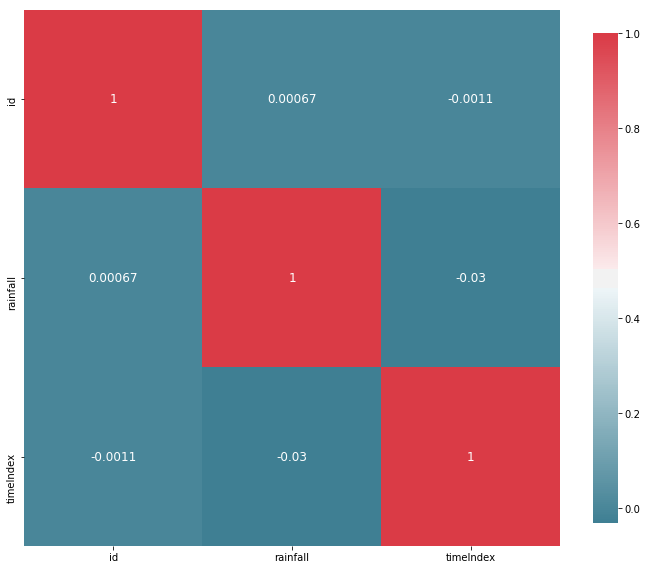

In [13]:
plot_correlation_map(timeHourRainfallDF)

As expected most variables in our dataset doesn't really correlate with one another. Afterall, it's hard to see how rainfall will influence the time index. You will notice how every variable is 100% correlated with itself (which makes sense). To generate this correlation graph we were calculating the covariance against each variable. Something you can learn more about here: http://www.wikihow.com/Calculate-Covariance

Now that we have some prerequsite knowledge on how to plot and graph in Python, lets try to visualize something more challenging. I want us to see, plotted on a map of Toronto, the largest downpours of rain each month avaiable in the dataset.

Lets start by importing the data we want to use. 

In [14]:
datalist = []
datalist.append(pd.read_csv("../2017_rainfall_data/rainfall201701.csv"))
datalist.append(pd.read_csv("../2017_rainfall_data/rainfall201702.csv"))
datalist.append(pd.read_csv("../2017_rainfall_data/rainfall201703.csv"))
datalist.append(pd.read_csv("../2017_rainfall_data/rainfall201704.csv"))
datalist.append(pd.read_csv("../2017_rainfall_data/rainfall201705.csv"))
datalist.append(pd.read_csv("../2017_rainfall_data/rainfall201706.csv"))
datalist.append(pd.read_csv("../2017_rainfall_data/sites201701.csv"))
datalist.append(pd.read_csv("../2017_rainfall_data/sites201702.csv"))
datalist.append(pd.read_csv("../2017_rainfall_data/sites201703.csv"))
datalist.append(pd.read_csv("../2017_rainfall_data/sites201704.csv"))
datalist.append(pd.read_csv("../2017_rainfall_data/sites201705.csv"))
datalist.append(pd.read_csv("../2017_rainfall_data/sites201706.csv"))

lets see what kind of data we've imported into our datalist

In [15]:
datalist[0].head()

,id,name,date,rainfall
0,7687,RG_016,2017-01-01T00:00:00,0.0
1,7687,RG_016,2017-01-01T00:05:00,0.0
2,7687,RG_016,2017-01-01T00:10:00,0.0
3,7687,RG_016,2017-01-01T00:15:00,0.0
4,7687,RG_016,2017-01-01T00:20:00,0.0


In [16]:
datalist[5].head()

,id,name,date,rainfall
0,7677,RG_001,2017-06-01T00:00:00,0.0
1,7677,RG_001,2017-06-01T00:05:00,0.0
2,7677,RG_001,2017-06-01T00:10:00,0.0
3,7677,RG_001,2017-06-01T00:15:00,0.0
4,7677,RG_001,2017-06-01T00:20:00,0.0


In [17]:
datalist[6].head()

,id,name,longitude,latitude
0,7677,RG_001,-79.478112,43.647680
1,7678,RG_002,-79.443616,43.651196
2,7679,RG_003,-79.405094,43.656616
3,7680,RG_004,-79.402833,43.678343
4,7681,RG_006,-79.375101,43.661265


In [18]:
datalist[11].head()

,id,name,longitude,latitude
0,7677,RG_001,-79.478112,43.647680
1,7678,RG_002,-79.443616,43.651196
2,7679,RG_003,-79.405094,43.656616
3,7680,RG_004,-79.402833,43.678343
4,7681,RG_006,-79.375101,43.661265


Since we imported the packages together, we know that 0-5 contain the rainfall data and 6-11 contain the geographical data.
(We could also have inferred this from the code we used to import our data, but it's always good to check!)

Lets combine the dataframes 0-5 into one giant rainfallDF and dataframes 6-11 into one giant geoDataDF

In [19]:
rainfallDF = datalist[0].append(datalist[1]).append(datalist[2]).append(datalist[3]).append(datalist[4]).append(datalist[5])
geoDataDF = datalist[6].append(datalist[7]).append(datalist[8]).append(datalist[9]).append(datalist[10]).append(datalist[11])

Lets see how long each df is

In [20]:
print("length of rainfallDF: " + str(len(rainfallDF)))
print("length of geoDataDF: " + str(len(geoDataDF)))

length of rainfallDF: 1807014
length of geoDataDF: 276


It looks like these two dataframes describes different datasets (because the number of rows don't match up).

But lets print the number of unique ids that each dataset contains. If they have the same number of unique names then we'll know they'll describe the same number of elements.

In [21]:
print("length of unique station names in rainfallDF: " + str(len(rainfallDF["name"].unique())))
print("length of unique ids in geoDataDF: " + str(len(geoDataDF["name"].unique())))

length of unique station names in rainfallDF: 45
length of unique ids in geoDataDF: 46


It seems like there is one more station location described in the geoDataDF than in the rainfallDF. This probably means that a new station was built but no readings have been recorded yet. Nonetheless, we have enough station locations to correspond each rainfall reading with the location from which it was read from. You may have noticed that every name in the geoDataDF describes the location of one geo station. Each station has many readings and their readings are recorded in the rainfallDF.

Now that we have a better understanding of the data within our two datasets, lets try to match up every rainfall reading with the lat lon of every station. This will give each rainfall reading a coordinate which we can use to plot on a map!

We'll the pandas join command to join the dataframes in the "name" column

In [22]:
geoRainfallDFPoorColumns = rainfallDF.merge(geoDataDF, left_on='name', right_on='name', how='outer')
geoRainfallDFPoorColumns.head()

,id_x,name,date,rainfall,id_y,longitude,latitude
0,7687.0,RG_016,2017-01-01T00:00:00,0.0,7687,-79.520366,43.608125
1,7687.0,RG_016,2017-01-01T00:00:00,0.0,7687,-79.520366,43.608125
2,7687.0,RG_016,2017-01-01T00:00:00,0.0,7687,-79.520366,43.608125
3,7687.0,RG_016,2017-01-01T00:00:00,0.0,7687,-79.520366,43.608125
4,7687.0,RG_016,2017-01-01T00:00:00,0.0,7687,-79.520366,43.608125


In [23]:
geoRainfallDFPoorColumns.drop(['id_x'], axis = 1, inplace = True, errors = 'ignore')
# errors = 'ignore' means that if the id_x column doesn't exist this won't error
geoRainfallDFPoorColumns.head()

,name,date,rainfall,id_y,longitude,latitude
0,RG_016,2017-01-01T00:00:00,0.0,7687,-79.520366,43.608125
1,RG_016,2017-01-01T00:00:00,0.0,7687,-79.520366,43.608125
2,RG_016,2017-01-01T00:00:00,0.0,7687,-79.520366,43.608125
3,RG_016,2017-01-01T00:00:00,0.0,7687,-79.520366,43.608125
4,RG_016,2017-01-01T00:00:00,0.0,7687,-79.520366,43.608125


Since we're going to use this dataframe for one more workshop, lets fix up the columns, specifically id_y. Lets rename it to just id and move this column to the left most index of the dataframe. 

In [24]:
#this makes it so that if your decide to re-run this cell then the columns will still be "disorganized"
geoRainfallDF = geoRainfallDFPoorColumns

#lets set the name of the columns
geoRainfallDF.columns = ['name', 'date', 'rainfall', 'id', 'longitude', 'latitude']

#lets re-roder the id column (looks familiar?)
geoRainfallDF = geoRainfallDF[['id', 'name', 'date', 'rainfall', 'longitude', 'latitude']]
geoRainfallDF.head()

,id,name,date,rainfall,longitude,latitude
0,7687,RG_016,2017-01-01T00:00:00,0.0,-79.520366,43.608125
1,7687,RG_016,2017-01-01T00:00:00,0.0,-79.520366,43.608125
2,7687,RG_016,2017-01-01T00:00:00,0.0,-79.520366,43.608125
3,7687,RG_016,2017-01-01T00:00:00,0.0,-79.520366,43.608125
4,7687,RG_016,2017-01-01T00:00:00,0.0,-79.520366,43.608125


Since we're going to be using this dataframe in later notebooks, lets save it as a dataframe.

In [25]:
geoRainfallDF.to_pickle("../saved_dataframes/geoRainfallDF")

Now lets plot the actual points on a map to see which parts of Toronto experiences the most rain!

First off, I never really wanted to use the Matplotlib mapping library to show you how to create maps because frankly it's pretty ugly and hard to work with. However after days of struggling with other sub-par mapping libraries I'm going to go back and show you how to map your data in Matplotlib. Simply because there are a lot more resources for Matplotlib maps. I rarely envy R but I have to admit that their graphing libraries are a lot better than Python's.

So without further adeau, lets start!

Although Python has many great mapping libraries from Plotly, gmaps, or even Basemap, we'll be using Folium because it merges the best of asthetics, startup speed, and complexity.

Folium is a project that builds ontop of the fantastic mapping library leaflet. For comparison, I personally think it's prettier and easier to setup than google maps.

Folium: https://github.com/python-visualization/folium

Leaflet: https://github.com/Leaflet/Leaflet

So lets download Folium!

In [26]:
!pip install folium
import folium

Lets see how it looks like

In [44]:
m = folium.Map(location=[43.6532, -79.3832], zoom_start=12) # for those of you wondering those are Toronto's lat lons
m

That looks pretty nice! You can also place points on a map. Try clicking on them!

In [46]:
folium.Marker([43.6426, -79.3871], popup='<i>CN Tower</i>').add_to(m)
folium.Marker([43.6677, -79.3948], popup='<b>Royal Ontario Museum</b>').add_to(m)
m

Obviously we cannot place pins down for every single reading (because all we would see are pins). Lets instead make a heatmap of all the readings.

In [31]:
len(geoRainfallDF)

10842090

Whoa that's a lot of rows! My computer would most likely explode if I displayed 10 million points on a map. Lets try to sample 1000 rows of this data to make it easier on our computers.

In [135]:
smallerDF = geoRainfallDF.sample(1000)

On the topic of size reduction, you can use this same trick when running predictions on your data. That is because machine learning algorithms will usually see diminishing returns when taking in more and more data. So it's best to find the best algorithm/parameters before running it on your full dataset. Anyway, lets plot this on a heatmap!

In [206]:
from folium.plugins import HeatMap

m2 = folium.Map(location=[43.6532, -79.3832], zoom_start=12)
latlons = smallerDF[["latitude","longitude"]].values
latlons = latlons.tolist() #this needs to be a python list
HeatMap(latlons).add_to(m2)

Note: it might take a while to display it on a map

In [137]:
m2

hmm notice how the points are clustering to specific spots on the map? Since we are displaying the readings for 100 or so locations, all the points of each loLetscation will lie directly on top of each other... Not very informative.

Most heatmap libraries will display  the heat of every location based each location's "hotness" in relation to the rest of the image. In essence, the larger the percentage of heat, the "hotter" an area appears. With this in mind, try zooming into the map on a cluster of points. You can see how certain blobs turn lighter and maybe some will even turn red. This is because the heatmap will disregard the irrelevant plots (because you zoomed  in). Now each individual reading will weigh more and thus, some might turn brighter. If you zoom in and look at only one point, it'll most certainly turn bright red because all of the points visible on screen is on that point.

In your own analyses, if your points are constantly red, then you might want to sample a smaller subset of your dataset to make the heatmap more sensitive to vairations (counts of points in an area).

Now I'm going to show you how to display points on a map as a circle instead of "pins". Lets plot every lat lon of every station as a blue dot

lets the lat longs of each station from the 201706 file


In [145]:
stationLocations = pd.read_csv("../2017_rainfall_data/sites201706.csv")
stationLocations.head()

,id,name,longitude,latitude
0,7677,RG_001,-79.478112,43.647680
1,7678,RG_002,-79.443616,43.651196
2,7679,RG_003,-79.405094,43.656616
3,7680,RG_004,-79.402833,43.678343
4,7681,RG_006,-79.375101,43.661265


In [204]:
m3 = folium.Map(location=[43.6532, -79.3832], zoom_start=12)
for index,row in stationLocations.iterrows():
    folium.CircleMarker((row["latitude"],row["longitude"]),radius=2,color='red',fill=True).add_to(m3)
#note you can change params of the circle like so:

#folium.CircleMarker(latlons,
#                    radius=500,
#                    popup='Station',
#                    color='#3186cc',
#                    fill_color='#3186cc',
#                   ).add_to(m3)

In [205]:
m3

lets put the heatmap on the markers to make sure we're not missing any stations

In [207]:
HeatMap(latlons).add_to(m3)
m3

Well that's it! Don't forget to save your map by clicking and selecting "save as". I hope you learned to how to visualize your data. If you came from the R version of this workshop and wish to use ggplot's tools as well, there is an excellent Python implimentation of ggplot which uses the same functions: http://ggplot.yhathq.com/how-it-works.html. Anyhow I hope you'll encover findings with graphs and we'll see you next week!